# Building a Libor Curve

This is an example of a replication of a BBG example from

https://github.com/vilen22/curve-building/blob/master/Bloomberg%20Curve%20Building%20Replication.xlsx

Agreement is very good however some issues about date generation need to be checked.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from financepy.finutils import *
from financepy.products.libor import *

###################################################################
# FINANCEPY BETA Version 0.180 - This build: 22 Sep 2020 at 19:38 #
#     This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy #
###################################################################



## Creating the Libor Instruments

In [2]:
valuationDate = FinDate(6, 6, 2018)

### Load up the deposits first

In [3]:
spotDays = 0
settlementDate = valuationDate.addWorkDays(spotDays)

In [4]:
depoDCCType = FinDayCountTypes.THIRTY_E_360_ISDA
depos = []
depositRate = 0.0231381
maturityDate = settlementDate.addMonths(3)
depo = FinLiborDeposit(settlementDate, maturityDate, depositRate, depoDCCType)
depos.append(depo)

### Create Strips of Interest Rate Futures 

In [5]:
futs = []
fut = FinLiborFuture(valuationDate, 1) ; futs.append(fut)
fut = FinLiborFuture(valuationDate, 2) ; futs.append(fut)
fut = FinLiborFuture(valuationDate, 3) ; futs.append(fut)
fut = FinLiborFuture(valuationDate, 4) ; futs.append(fut)
fut = FinLiborFuture(valuationDate, 5) ; futs.append(fut)
fut = FinLiborFuture(valuationDate, 6) ; futs.append(fut)

### Convert Interest Rate Futures to FRAs

Need to supply futures price and the convexity (in percent)

In [6]:
fras = [None]*6
fras[0] = futs[0].toFRA(97.6675,-0.00005)
fras[1] = futs[1].toFRA(97.5200,-0.00060)
fras[2] = futs[2].toFRA(97.3550,-0.00146)
fras[3] = futs[3].toFRA(97.2450,-0.00263)
fras[4] = futs[4].toFRA(97.1450,-0.00411)
fras[5] = futs[5].toFRA(97.0750,-0.00589)

### Then we load up swap rates

In [11]:
accrual = FinDayCountTypes.THIRTY_E_360
freq = FinFrequencyTypes.SEMI_ANNUAL
longEnd = FinDateGenRuleTypes.BACKWARD
swapType = FinLiborSwapTypes.PAYER

In [12]:
spotDays = 2
settlementDate = valuationDate.addWorkDays(spotDays)
notional = ONE_MILLION

In [13]:
swaps = []
swap = FinLiborSwap(settlementDate, "2Y", swapType, (2.77417+2.77844)/200, freq, accrual, notional); swaps.append(swap)
swap = FinLiborSwap(settlementDate, "3Y", swapType, (2.86098+2.86582)/200, freq, accrual); swaps.append(swap)
swap = FinLiborSwap(settlementDate, "4Y", swapType, (2.90240+2.90620)/200, freq, accrual); swaps.append(swap)
swap = FinLiborSwap(settlementDate, "5Y", swapType, (2.92944+2.92906)/200, freq, accrual); swaps.append(swap)
swap = FinLiborSwap(settlementDate, "6Y", swapType, (2.94001+2.94499)/200, freq, accrual); swaps.append(swap)
swap = FinLiborSwap(settlementDate, "7Y", swapType, (2.95352+2.95998)/200, freq, accrual); swaps.append(swap)
swap = FinLiborSwap(settlementDate, "8Y", swapType, (2.96830+2.97400)/200, freq, accrual); swaps.append(swap)
swap = FinLiborSwap(settlementDate, "9Y", swapType, (2.98403+2.98817)/200, freq, accrual); swaps.append(swap)
swap = FinLiborSwap(settlementDate, "10Y", swapType, (2.99716+3.00394)/200, freq, accrual); swaps.append(swap)
swap = FinLiborSwap(settlementDate, "11Y", swapType, (3.01344+3.01596)/200, freq, accrual); swaps.append(swap)
swap = FinLiborSwap(settlementDate, "12Y", swapType, (3.02276+3.02684)/200, freq, accrual); swaps.append(swap)
swap = FinLiborSwap(settlementDate, "15Y", swapType, (3.04092+3.04508)/200, freq, accrual); swaps.append(swap)
swap = FinLiborSwap(settlementDate, "20Y", swapType, (3.04417+3.05183)/200, freq, accrual); swaps.append(swap)
swap = FinLiborSwap(settlementDate, "25Y", swapType, (3.03219+3.03621)/200, freq, accrual); swaps.append(swap)
swap = FinLiborSwap(settlementDate, "30Y", swapType, (3.01030+3.01370)/200, freq, accrual); swaps.append(swap)
swap = FinLiborSwap(settlementDate, "40Y", swapType, (2.96946+2.97354)/200, freq, accrual); swaps.append(swap)
swap = FinLiborSwap(settlementDate, "50Y", swapType, (2.91552+2.93748)/200, freq, accrual); swaps.append(swap)

## Build the Curve

In [14]:
depos

[OBJECT TYPE: FinLiborDeposit
 START DATE: WED 06 JUN 2018
 MATURITY DATE: THU 06 SEP 2018
 NOTIONAL: 100.0
 DEPOSIT RATE: 0.0231381
 DAY COUNT TYPE: FinDayCountTypes.THIRTY_E_360_ISDA
 CALENDAR: FinCalendarTypes.WEEKEND
 BUS DAY ADJUST TYPE: FinBusDayAdjustTypes.MODIFIED_FOLLOWING]

In [15]:
settlementDate

FRI 08 JUN 2018

In [16]:
liborCurve = FinLiborCurve(valuationDate, depos, fras, swaps)

## Curve Examination

Generate a vector of time points and then generate zero rates and forward rates

In [17]:
years = np.linspace(0.01,50,1000)
dates = settlementDate.addYears(years)
zeroRates = liborCurve.zeroRate(dates)
fwdRates = liborCurve.fwd(dates)

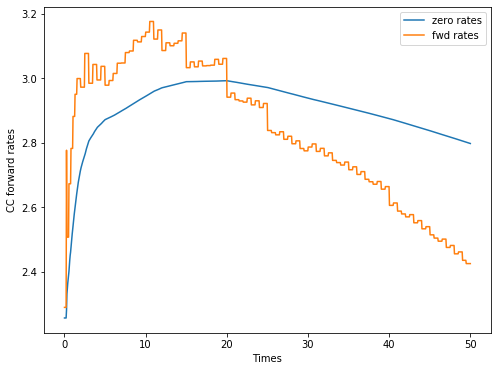

In [18]:
plt.figure(figsize=(8,6))
plt.plot(years, zeroRates*100, label="zero rates")
plt.plot(years, fwdRates*100, label = "fwd rates")
plt.xlabel("Times")
plt.ylabel("CC forward rates")
plt.legend();

We see that the forward rates are piecewise flat

## Detailed Valuation

In [19]:
swaps[0].value(settlementDate, liborCurve, liborCurve)

-1.6007106751203537e-10

In [20]:
swaps[0].fixedLegValue(settlementDate, liborCurve)

53715.219093617416

In [21]:
swaps[0].floatLegValue(settlementDate, liborCurve, liborCurve)

53715.219093617256

In [22]:
swaps[0].printFixedLegPV()

START DATE: FRI 08 JUN 2018
MATURITY DATE: MON 08 JUN 2020
COUPON (%): 2.776305
FIXED LEG FREQUENCY: FinFrequencyTypes.SEMI_ANNUAL
FIXED LEG DAY COUNT: FinDayCountTypes.THIRTY_E_360
VALUATION DATE FRI 08 JUN 2018
PAYMENT_DATE     YEAR_FRAC        FLOW         DF         DF*FLOW       CUM_PV
FRI 08 JUN 2018          -            -   1.00000000            -            -
MON 10 DEC 2018  0.5055556     14035.76   0.98781403     13864.72     13864.72
MON 10 JUN 2019  0.5000000     13881.52   0.97454325     13528.15     27392.87
MON 09 DEC 2019  0.4972222     13804.41   0.96052302     13259.45     40652.32
MON 08 JUN 2020  0.4972222     13804.41   0.94628478     13062.90     53715.22


In [23]:
swaps[0].printFloatLegPV()

START DATE: FRI 08 JUN 2018
MATURITY DATE: MON 08 JUN 2020
SPREAD COUPON (%): 0.0
FLOAT LEG FREQUENCY: FinFrequencyTypes.QUARTERLY
FLOAT LEG DAY COUNT: FinDayCountTypes.THIRTY_E_360
VALUATION DATE FRI 08 JUN 2018
         *** FIRST FLOATING RATE PAYMENT IS IMPLIED ***
PAYMENT_DATE     YEAR_FRAC    RATE(%)       FLOW         DF         DF*FLOW       CUM_PV
FRI 08 JUN 2018          -          -            -   1.00000000            -            -
MON 10 SEP 2018  0.2555556    2.33387      5964.33   0.99407103      5928.97      5928.97
MON 10 DEC 2018  0.2500000    2.53368      6334.19   0.98781403      6257.01     12185.97
FRI 08 MAR 2019  0.2444444    2.62646      6420.24   0.98151248      6301.55     18487.52
MON 10 JUN 2019  0.2555556    2.79833      7151.28   0.97454325      6969.23     25456.75
MON 09 SEP 2019  0.2472222    2.90499      7181.78   0.96759420      6949.05     32405.80
MON 09 DEC 2019  0.2500000    2.94472      7361.81   0.96052302      7071.18     39476.98
MON 09 MAR 2

Copyright (c) 2020 Dominic O'Kane